In [26]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


In [2]:
train_dir = r"C:\Users\HP\Desktop\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"
val_dir = r"C:\Users\HP\Desktop\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"

In [10]:
categories = os.listdir(train_dir)


In [11]:
plants= []
No_of_disease= 0
for plant in categories:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        No_of_disease += 1

In [22]:
print("Plants:", plants)
print("Number of diseased plants:", No_of_disease)

Plants: ['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']
Number of diseased plants: 26


In [23]:
nums= {}
for category in categories: 
    nums[category]= len(os.listdir(train_dir+ '/'+ category))

In [28]:
df= pd.DataFrame(nums.values(), index= nums.keys(), columns= ['Number of Photos'] )
df.head()

,Number of Photos
Apple___Apple_scab,2016
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816


In [29]:
channels= 3
batch_size= 32
img_size=256

In [30]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle= True,
    image_size=(200,200),
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    validation_split=None,
    subset=None,
    interpolation="bilinear", 
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [31]:
val_data= tf.keras.utils.image_dataset_from_directory(
    val_dir,
    shuffle=True,
    image_size= (200,200),
    labels= 'inferred',
    color_mode='rgb',
    batch_size=32,
    validation_split=None,
    subset=None,
    interpolation="bilinear", 
    follow_links=False,
    crop_to_aspect_ratio=False
    
    
)

Found 17572 files belonging to 38 classes.


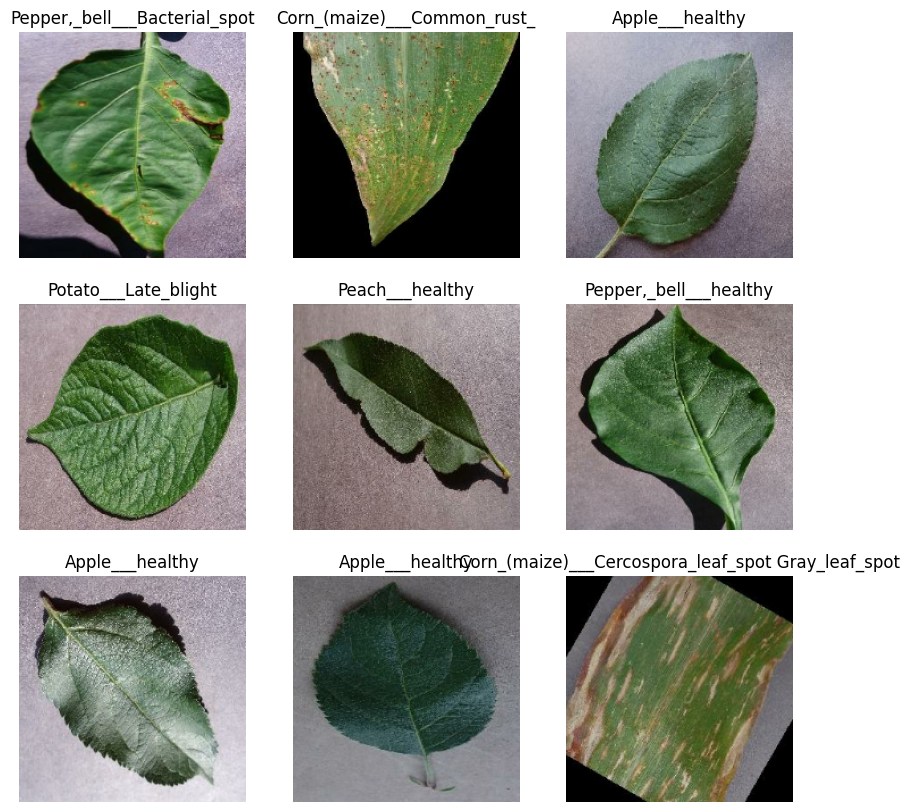

In [32]:
plt.figure(figsize=(10,10))
for image, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(categories[labels[i]])
        plt.axis('off')

In [33]:
num_classes = len(np.unique(categories))

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(200, 200, 3)), 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  
])




In [52]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,782,886 (22.06 MB)

 Trainable params: 5,782,886 (22.06 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2057s 934ms/step - accuracy: 0.3728 - loss: 2.5536 - val_accuracy: 0.8412 - val_loss: 0.5418
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1559s 709ms/step - accuracy: 0.8097 - loss: 0.6232 - val_accuracy: 0.9268 - val_loss: 0.2384
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1242s 565ms/step - accuracy: 0.8969 - loss: 0.3385 - val_accuracy: 0.9330 - val_loss: 0.2069
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1578s 718ms/step - accuracy: 0.9292 - loss: 0.2236 - val_accuracy: 0.9544 - val_loss: 0.1385
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1577s 718ms/step - accuracy: 0.9470 - loss: 0.1644 - val_accuracy: 0.9569 - val_loss: 0.1319
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1579s 719ms/step - accuracy: 0.9605 - loss: 0.1189 - val_accuracy: 0.9689 - val_loss: 0.1019
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1563s 711ms/step - accuracy: 0.9697 - loss: 0.0915 - val_accuracy: 0.9690 - val_loss: 0.0994
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1528s 695ms/s

# model evaluation

In [54]:
train_loss, train_acc = model.evaluate(train_data)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 348s 158ms/step - accuracy: 0.9955 - loss: 0.0153


In [55]:
print(train_loss,train_acc)

0.013217060826718807 0.9961305856704712


In [56]:
val_loss, val_acc = model.evaluate(val_data)

550/550 ━━━━━━━━━━━━━━━━━━━━ 90s 164ms/step - accuracy: 0.9701 - loss: 0.0971


In [57]:
print(val_loss,val_acc)

0.09436053782701492 0.9713180065155029


In [58]:
model.save("Plant_model.keras")

In [61]:
history.history

{'accuracy': [0.5653460621833801,
  0.8376982808113098,
  0.9049007892608643,
  0.9348886609077454,
  0.9503236413002014,
  0.9611778855323792,
  0.9710078835487366,
  0.9747776985168457,
  0.9787324666976929,
  0.9809659123420715],
 'loss': [1.5714142322540283,
  0.5283901691436768,
  0.30577343702316284,
  0.20440281927585602,
  0.153246209025383,
  0.11766228824853897,
  0.08977822214365005,
  0.0787414088845253,
  0.06447400152683258,
  0.06031364947557449],
 'val_accuracy': [0.8412246704101562,
  0.9267584681510925,
  0.9330184459686279,
  0.9544160962104797,
  0.9568631649017334,
  0.9689278602600098,
  0.9689847230911255,
  0.9681880474090576,
  0.9723992943763733,
  0.9713180065155029],
 'val_loss': [0.5418294072151184,
  0.23841248452663422,
  0.2068813294172287,
  0.13852055370807648,
  0.13192687928676605,
  0.10194685310125351,
  0.09936999529600143,
  0.10718163847923279,
  0.09127278625965118,
  0.09436055272817612]}

In [63]:
import json
with open("training_history.json", "w") as f:
    json.dump(history.history,f)


## Model Evaluation

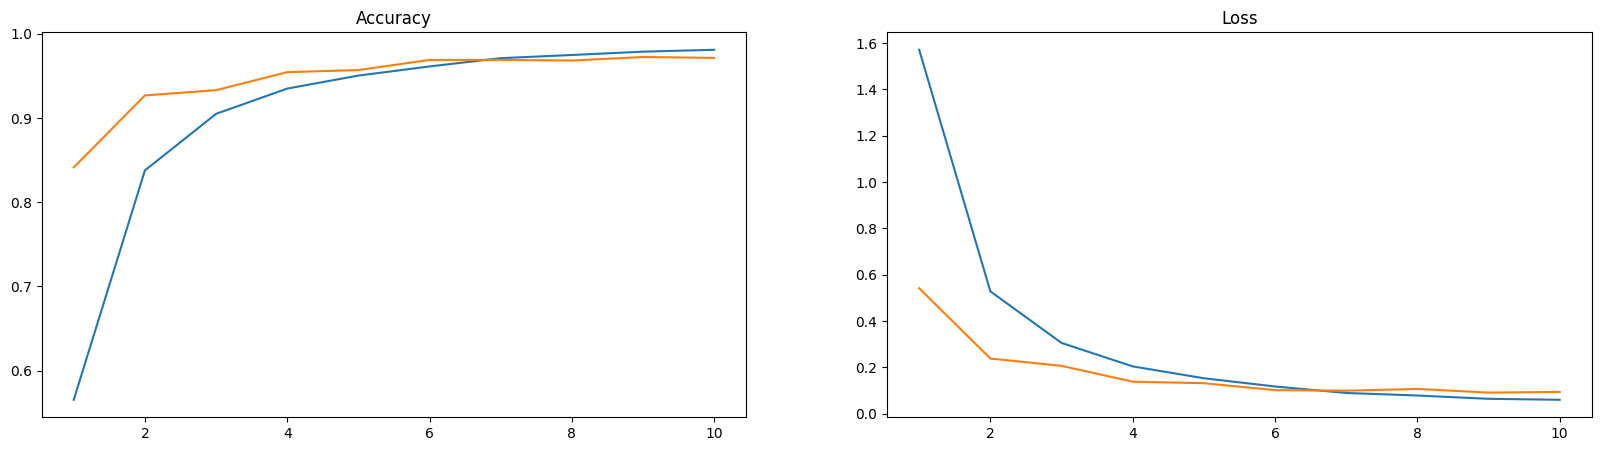

In [64]:
epoch= [i for i in range(1,11)]
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.plot(epoch, history.history['accuracy'], label= 'Training Accuracy')
plt.plot(epoch, history.history['val_accuracy'], label= 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epoch, history.history['loss'], label= 'Training Loss')
plt.plot(epoch, history.history['val_loss'], label= 'Validation Loss')
plt.title('Loss')
plt.show()

In [65]:
categories

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [66]:
test_data = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    shuffle=False,
    image_size= (200,200),
    labels= 'inferred',
    color_mode='rgb',
    batch_size=32,
    validation_split=None,
    subset=None,
    interpolation="bilinear", 
    follow_links=False,
    crop_to_aspect_ratio=False    
    
)

Found 17572 files belonging to 38 classes.


In [67]:
y_pred = model.predict(test_data)

550/550 ━━━━━━━━━━━━━━━━━━━━ 88s 157ms/step


In [68]:
y_pred

array([[9.99993682e-01, 7.07884055e-07, 4.25501234e-09, ...,
        1.62382130e-12, 7.10735832e-13, 3.43613915e-10],
       [8.39944065e-01, 4.38157265e-04, 2.71982941e-07, ...,
        5.91343294e-08, 2.07576978e-09, 8.81536437e-07],
       [1.00000000e+00, 6.51454168e-11, 2.51693248e-14, ...,
        1.99781162e-20, 2.32601575e-18, 1.35261624e-14],
       ...,
       [6.44962328e-14, 3.19140669e-14, 1.82903389e-12, ...,
        1.21742233e-14, 1.38560455e-13, 9.99999881e-01],
       [1.05742306e-13, 2.10319530e-15, 1.94058721e-15, ...,
        6.28818308e-16, 1.66610759e-16, 1.00000000e+00],
       [3.53995477e-16, 3.09634900e-20, 2.59538102e-19, ...,
        1.14687897e-20, 7.69409285e-19, 1.00000000e+00]], dtype=float32)

In [69]:
y_pred.shape

(17572, 38)

In [70]:
predicted_categories= tf.argmax(y_pred, axis=1)

In [71]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [72]:
real_categories= tf.concat([y for x,y in test_data], axis=0)

In [76]:
real_categories

<tf.Tensor: shape=(17572,), dtype=int32, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [77]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(real_categories,predicted_categories)

In [80]:
print(classification_report(real_categories,predicted_categories,target_names=categories))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.96      0.97       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.97       440
                                   Apple___healthy       0.96      0.97      0.97       502
                               Blueberry___healthy       0.97      0.98      0.98       454
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       421
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.89      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
                            Corn_(maize)___healthy       0.93      0.97      0.

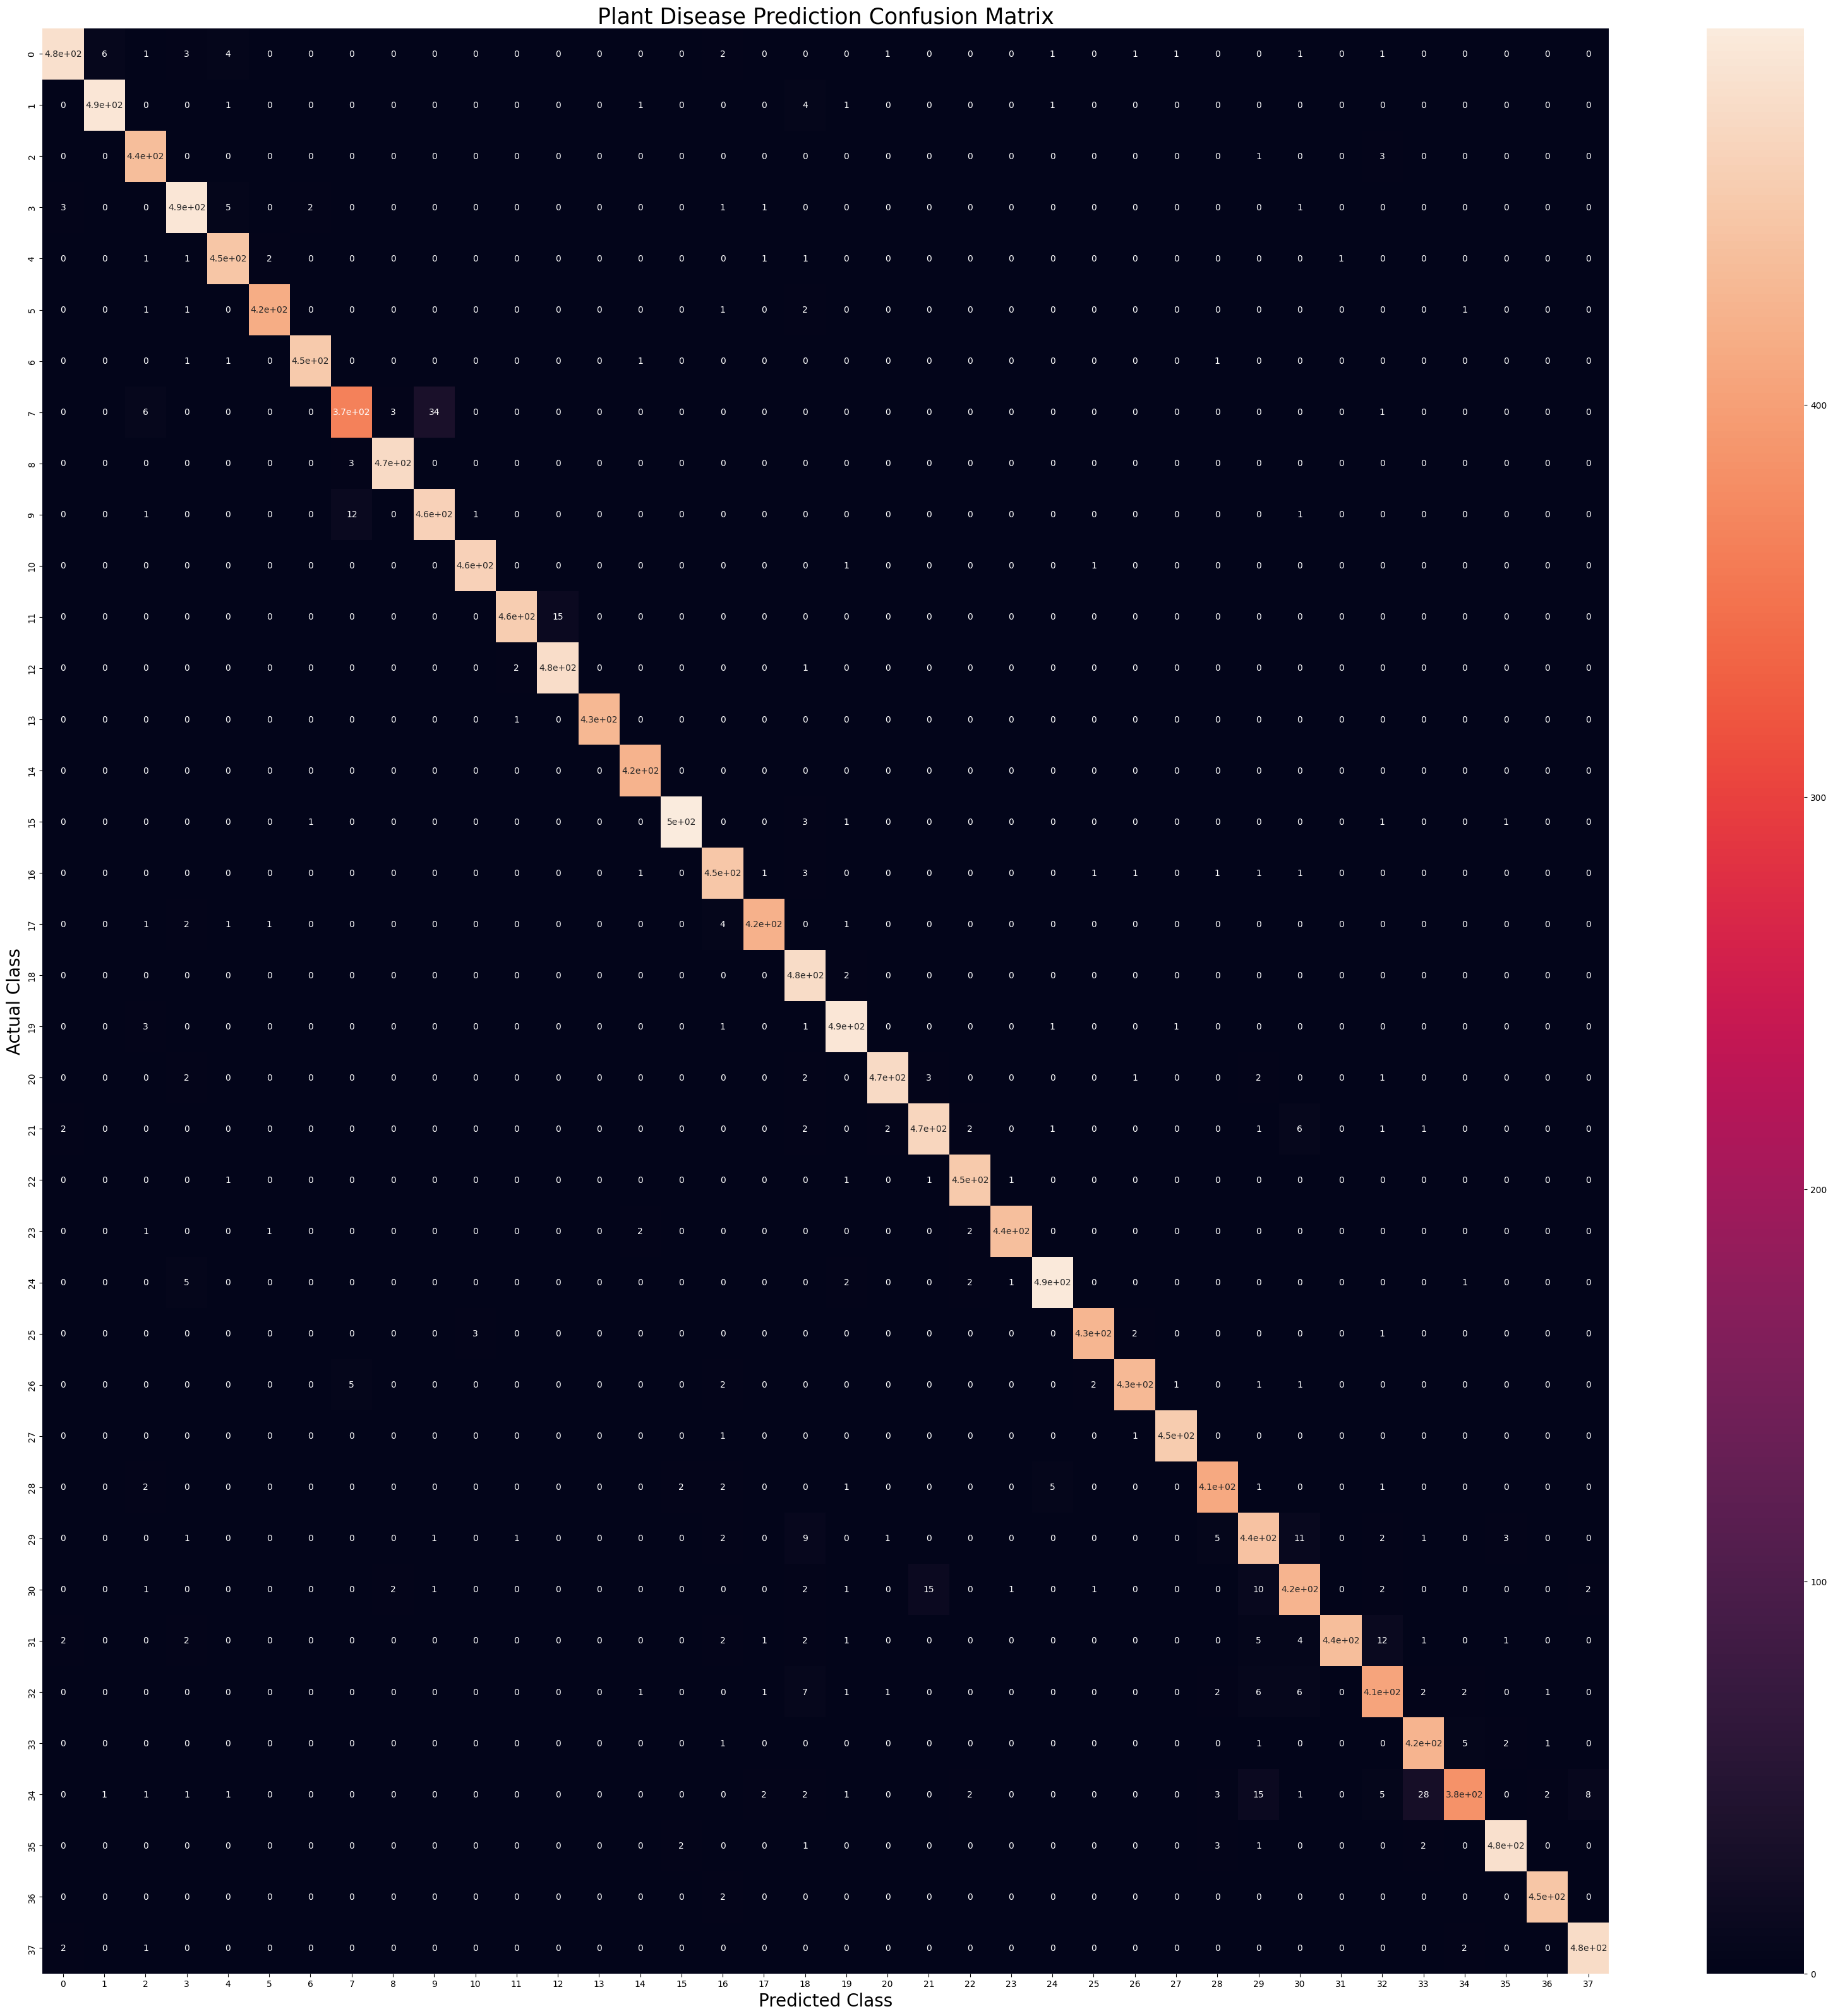

In [82]:
import seaborn as sns 
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()